In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "F:\DATA SCIENCE SKILLS TECHNOLOGY\FIELD PPT 2024- AI, ML\ENROLMENT.csv"

In [3]:
data = pd.read_csv(file_path)
data.head()

,YEAR,COURSE,SELECTED,CAPACITY,REGISTERED
0,2019/2020,DIPLOMA IN ARCHITECTURE,90,105,53
1,2019/2020,DIPLOMA IN ELECTRICAL AND ELECTRONIC ENGINEERING,250,290,207
2,2019/2020,DIPLOMA IN LABORATORY SCIENCE AND TECHNOLOGY,100,175,33
3,2019/2020,DIPLOMA IN ELECTRONICS AND TELECOMMUNICATION E...,150,85,93
4,2019/2020,DIPLOMA IN HIGHWAY ENGINEERING,70,75,34


# **Step 2: Data Exploration and Cleaning**

2.1. Understand the Data

2.2: Handle Missing Values



In [ ]:
# Understand the Data
# Display basic information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        262 non-null    object
 1   COURSE      262 non-null    object
 2   SELECTED    262 non-null    int64 
 3   CAPACITY    262 non-null    int64 
 4   REGISTERED  262 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 10.4+ KB
None


In [ ]:
# Display summary statistics of the DataFrame
print(data.describe())

         SELECTED    CAPACITY  REGISTERED
count  262.000000  262.000000  262.000000
mean   116.748092  125.026718   66.278626
std    101.849400   89.009854   70.139015
min      0.000000    5.000000    0.000000
25%     49.000000   50.000000   12.000000
50%     89.000000  105.000000   41.000000
75%    158.250000  180.000000   96.750000
max    450.000000  300.000000  289.000000


In [ ]:
#2.2: Handle Missing Values
# Check for missing values
print(data.isnull().sum())

YEAR          0
COURSE        0
SELECTED      0
CAPACITY      0
REGISTERED    0
dtype: int64


In [4]:
#Step 2.3: Data Cleaning
# Convert numerical columns to appropriate data types (if needed)
data['SELECTED'] = pd.to_numeric(data['SELECTED'], errors='coerce')
data['CAPACITY'] = pd.to_numeric(data['CAPACITY'], errors='coerce')
data['REGISTERED'] = pd.to_numeric(data['REGISTERED'], errors='coerce')

In [5]:
# Check for any anomalies in the data (e.g., negative values, values exceeding capacity, etc.)
print((data['SELECTED'] < 0).sum())  # Check for negative values in SELECTED
print((data['REGISTERED'] < 0).sum())  # Check for negative values in REGISTERED
print((data['REGISTERED'] > data['CAPACITY']).sum())  # Check for REGISTERED exceeding CAPACITY


0
0
44


In [6]:
# # Handle any anomalies as needed (e.g., removing or correcting rows)
# # Example: Removing rows where REGISTERED exceeds CAPACITY
# data = data[data['REGISTERED'] <= data['CAPACITY']]

In [7]:
# Display the cleaned DataFrame
print(data.head())

        YEAR                                             COURSE  SELECTED  \
0  2019/2020                            DIPLOMA IN ARCHITECTURE        90   
1  2019/2020   DIPLOMA IN ELECTRICAL AND ELECTRONIC ENGINEERING       250   
2  2019/2020       DIPLOMA IN LABORATORY SCIENCE AND TECHNOLOGY       100   
3  2019/2020  DIPLOMA IN ELECTRONICS AND TELECOMMUNICATION E...       150   
4  2019/2020                     DIPLOMA IN HIGHWAY ENGINEERING        70   

   CAPACITY  REGISTERED  
0       105          53  
1       290         207  
2       175          33  
3        85          93  
4        75          34  


# **Step 3: Feature Engineering**

Feature engineering involves creating new features or transforming existing ones to improve the performance of machine learning models. Here are some ideas for feature engineering based on your dataset:

**Year Extraction:** Extract the starting year from the YEAR column.

**Course Popularity:** Calculate the popularity of each course based on the number of registered students.

**Capacity Utilization:** Calculate the utilization rate of the course capacity.

**Historical Trends:** Create lag features that capture historical trends in the data.


**3.1: YEAR EXTRACTION**

In [ ]:
#We can extract the starting year from the YEAR column for easier analysis.
# Extract the starting year from the 'YEAR' column
data['START_YEAR'] = data['YEAR'].apply(lambda x: int(x.split('/')[0]))

# Display the updated DataFrame
data.head()

,YEAR,COURSE,SELECTED,CAPACITY,REGISTERED,START_YEAR
0,2019/2020,DIPLOMA IN ARCHITECTURE,90,105,53,2019
1,2019/2020,DIPLOMA IN ELECTRICAL AND ELECTRONIC ENGINEERING,250,290,207,2019
2,2019/2020,DIPLOMA IN LABORATORY SCIENCE AND TECHNOLOGY,100,175,33,2019
3,2019/2020,DIPLOMA IN ELECTRONICS AND TELECOMMUNICATION E...,150,85,93,2019
4,2019/2020,DIPLOMA IN HIGHWAY ENGINEERING,70,75,34,2019


**3.2 COURSE POPULARITY**

In [8]:
# Calculate the popularity of each course as the mean number of registered students
course_popularity = data.groupby('COURSE')['REGISTERED'].mean().reset_index()
course_popularity.columns = ['COURSE', 'COURSE_POPULARITY']

# Merge the popularity feature back into the original DataFrame
data = pd.merge(data, course_popularity, on='COURSE', how='left')

In [9]:
# Display the updated DataFrame
data.head()

,YEAR,COURSE,SELECTED,CAPACITY,REGISTERED,COURSE_POPULARITY
0,2019/2020,DIPLOMA IN ARCHITECTURE,90,105,53,45.0
1,2019/2020,DIPLOMA IN ELECTRICAL AND ELECTRONIC ENGINEERING,250,290,207,176.4
2,2019/2020,DIPLOMA IN LABORATORY SCIENCE AND TECHNOLOGY,100,175,33,71.2
3,2019/2020,DIPLOMA IN ELECTRONICS AND TELECOMMUNICATION E...,150,85,93,43.0
4,2019/2020,DIPLOMA IN HIGHWAY ENGINEERING,70,75,34,23.2


**3.3 CAPACITY UTILIZATION**

In [ ]:
# Calculate the capacity utilization rate
data['CAPACITY_UTILIZATION'] = data['REGISTERED'] / data['CAPACITY']

In [ ]:
# Display the updated DataFrame
data.head()

,YEAR,COURSE,SELECTED,CAPACITY,REGISTERED,START_YEAR,COURSE_POPULARITY,CAPACITY_UTILIZATION
0,2019/2020,DIPLOMA IN ARCHITECTURE,90,105,53,2019,53.0,0.504762
1,2019/2020,DIPLOMA IN ELECTRICAL AND ELECTRONIC ENGINEERING,250,290,207,2019,176.4,0.713793
2,2019/2020,DIPLOMA IN LABORATORY SCIENCE AND TECHNOLOGY,100,175,33,2019,33.0,0.188571
3,2019/2020,DIPLOMA IN ELECTRONICS AND TELECOMMUNICATION E...,150,85,93,2019,43.0,1.094118
4,2019/2020,DIPLOMA IN HIGHWAY ENGINEERING,70,75,34,2019,34.0,0.453333


**3.4 HISTORICAL TRENDS (Lag Features)**

In [ ]:
#Create lag features to capture historical trends.
#For example, the number of registered students in the previous year.

# Sort data by course and start year
data = data.sort_values(by=['COURSE', 'START_YEAR'])

# Create lag features for the number of registered students
data['REGISTERED_LAG_1'] = data.groupby('COURSE')['REGISTERED'].shift(1)


# Fill any NaN values resulting from the lag operation
data = data.fillna(0)

In [ ]:
# Display the updated DataFrame
data.head()

,YEAR,COURSE,SELECTED,CAPACITY,REGISTERED,START_YEAR,COURSE_POPULARITY,CAPACITY_UTILIZATION,REGISTERED_LAG_1
6,2019/2020,DIPLOMA IN MECHATRONICS ENGINEERING,75,80,29,2019,29.0,0.362500,0.0
136,2021/2022,BACHELOR OF AGRIBUSINESS MANAGEMENT AND TECHNO...,277,300,107,2021,226.0,0.356667,0.0
192,2022/2023,BACHELOR OF AGRIBUSINESS MANAGEMENT AND TECHNO...,350,300,282,2022,226.0,0.940000,107.0
249,2023/2024,BACHELOR OF AGRIBUSINESS MANAGEMENT AND TECHNO...,418,300,289,2023,226.0,0.963333,282.0
34,2019/2020,BACHELOR OF BUSINESS ADMINISTRATION-THREE YEARS,63,260,27,2019,135.2,0.103846,0.0


Explanation of above steps performed

Year Extraction: This step simplifies the YEAR column to a numeric starting year which can be used in model training.

Course Popularity: By calculating the average number of registered students per course, we create a feature indicating the popularity of a course.

Capacity Utilization: This feature represents how well the course capacity is utilized.

Historical Trends (Lag Features): Lag features help capture the trend by providing historical context for the current enrollment numbers.

# **STEP 4. DATA SPLITTING**

Splitting the data into training and testing sets is important for evaluation of the performance of our model how is it performing.

The training set is used to train the model, while the testing set is used to evaluate the performance of the model on unseen (new) data.

**4.1 DEFINE FEATURES (INPUT) AND TARGET (OUTPUT)**


Define the features (X) and the target variable (y). In this case, we will predict the REGISTERED column based on other features.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features as (X) and the target as (y)
# We will exclude the 'YEAR', 'COURSE', and 'REGISTERED' columns from features
features = ['SELECTED', 'CAPACITY', 'START_YEAR', 'COURSE_POPULARITY', 'CAPACITY_UTILIZATION', 'REGISTERED_LAG_1']
X = data[features]
y = data['REGISTERED']

**4.2 SPLITING DATA**

Split the data into training and testing sets.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (209, 6)
X_test shape: (53, 6)
y_train shape: (209,)
y_test shape: (53,)


# **Step 5: MODEL SELECTION**

Selecting the right machine learning model is the important step for the success of our prediction task. Given the nature of our data is (predicting student enrollment), several regression algorithms could be suitable.

Here are some common regression algorithms to consider:

**Linear Regression:** A basic but often effective model for regression tasks.

**Decision Tree Regressor:** Captures non-linear relationships by splitting the data into different branches.

**Random Forest Regressor:** An ensemble method that builds multiple decision trees and averages their predictions.

**Gradient Boosting Regressor:** An advanced ensemble technique that builds trees sequentially to minimize errors.

**Support Vector Regressor (SVR)**: Uses support vector machines for regression tasks, effective for small to medium-sized datasets.

**IMPORT NECESSARY LIBRARIES**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

**INITIALIZING MODELS**

In [ ]:
# Initialize models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

**TRAINING MODELS**

In [ ]:
# Train the models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

**EVALUATE MODELS**

In [ ]:
# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)
y_pred_boosting = gradient_boosting_model.predict(X_test)


In [ ]:

# Calculate performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)


In [ ]:
r2_linear = r2_score(y_test, y_pred_linear)
r2_tree = r2_score(y_test, y_pred_tree)
r2_forest = r2_score(y_test, y_pred_forest)
r2_boosting = r2_score(y_test, y_pred_boosting)


In [ ]:
# Print the performance metrics
print(f"Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}")
print(f"Decision Tree Regressor - MSE: {mse_tree}, R^2: {r2_tree}")
print(f"Random Forest Regressor - MSE: {mse_forest}, R^2: {r2_forest}")
print(f"Gradient Boosting Regressor - MSE: {mse_boosting}, R^2: {r2_boosting}")


Linear Regression - MSE: 381.39242825918063, R^2: 0.8773376404564837
Decision Tree Regressor - MSE: 296.35849056603774, R^2: 0.9046860162129868
Random Forest Regressor - MSE: 229.32484339622644, R^2: 0.9262451891839534
Gradient Boosting Regressor - MSE: 168.05487504478612, R^2: 0.9459506639922707


Importing necessary libraries and models from Scikit-learn.

Initializing and train multiple models to compare their performance.

Evaluating Models: Make predictions on the test set and evaluate each model using Mean Squared Error (MSE) and R-squared (R²) metrics.

# **ANALYSIS OF THE MODELS PERFORMANCE**

From the results obtained from the above training models, it's clear that the Gradient Boosting Regressor has the best performance among the models tested (the performace of approximate 95% accurate), with the lowest Mean Squared Error (MSE) of 168 and the highest R-squared (R²) value.

Here is a summary of the results from our models:

Linear Regression:

MSE: 381.39

R-squared: 0.8773

Decision Tree Regressor:

MSE: 296.36

R-squared: 0.9047

Random Forest Regressor:

MSE: 229.32

R-squared: 0.9262


Gradient Boosting Regressor:

MSE: 168.05

R-squared: 0.9460

Since the Gradient Boosting Regressor has shown the best performance,
we should focus on tuning this model to further improve its accuracy.

Before we proceed with hyperparameter tuning, it's also beneficial to perform feature importance analysis and possibly reconsider including the COURSE column with proper encoding.

# **STEP 6: HYPERPARAMETER TUNING**

We can use GridSearchCV or RandomizedSearchCV from Scikit-learn to find the best hyperparameters for the Gradient Boosting Regressor.

Lets start by using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the GridSearchCV with GradientBoostingRegressor
grid_search = GridSearchCV(
    estimator=gradient_boosting_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
    )

In [ ]:
# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.9540168128824831


In [ ]:
# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [ ]:
# Calculate the performance metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [ ]:
print(f"Best Gradient Boosting Regressor - MSE: {mse_best}, R^2: {r2_best}")

Best Gradient Boosting Regressor - MSE: 130.052939829295, R^2: 0.9581727394593386


Analysis of Tuned Model Performance
The tuned Gradient Boosting Regressor has further improved performance:

Best Gradient Boosting Regressor:

MSE: 130.05

R-squared: 0.9582

These results indicate that the model performs very well, with a lower MSE and higher R-squared compared to the initial models.

# **Step 8: Cross-Validation**

Perform cross-validation to ensure that the model's performance is consistent across different subsets of the data.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='r2')

# Print the cross-validation scores and their mean
print(f"Cross-Validation R² Scores: {cv_scores}")
print()
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [0.94443619 0.9292569  0.96367054 0.98639499 0.97250681 0.98103644
 0.94789268 0.97565746 0.96085879 0.89292669]

Mean Cross-Validation R² Score: 0.9554637487708622


# **Step 9: Feature Importance Analysis**

Understand which features contribute most to the model's predictions.

In [ ]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_

In [ ]:
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

In [ ]:
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Display the feature importances
print(importance_df)

                Feature  Importance
0              SELECTED    0.762407
3     COURSE_POPULARITY    0.106638
4  CAPACITY_UTILIZATION    0.088049
1              CAPACITY    0.030402
5      REGISTERED_LAG_1    0.011170
2            START_YEAR    0.001334


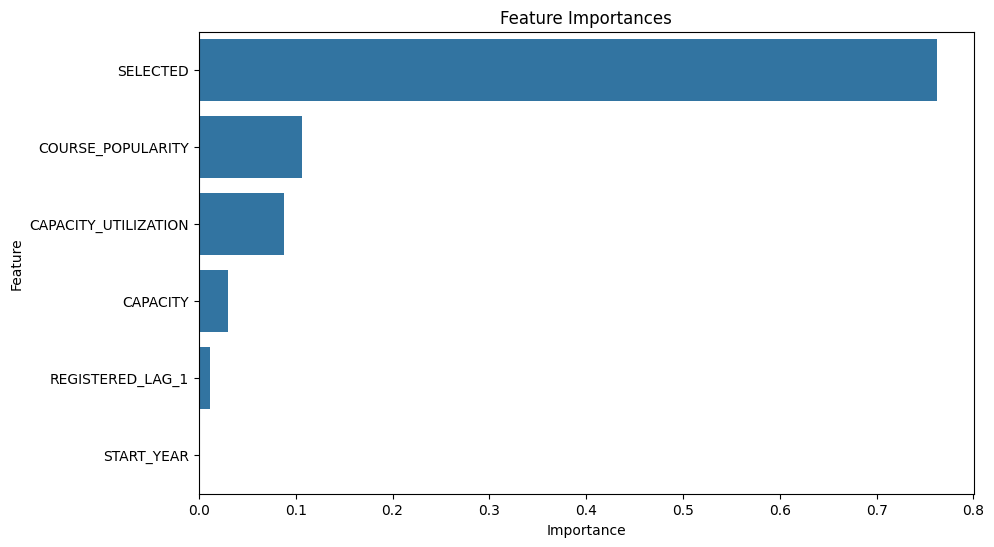

In [ ]:
# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# **ACTUAL Vs PREDICTED VALUES**

Plot the actual values versus the predicted values to see how well the model performs.

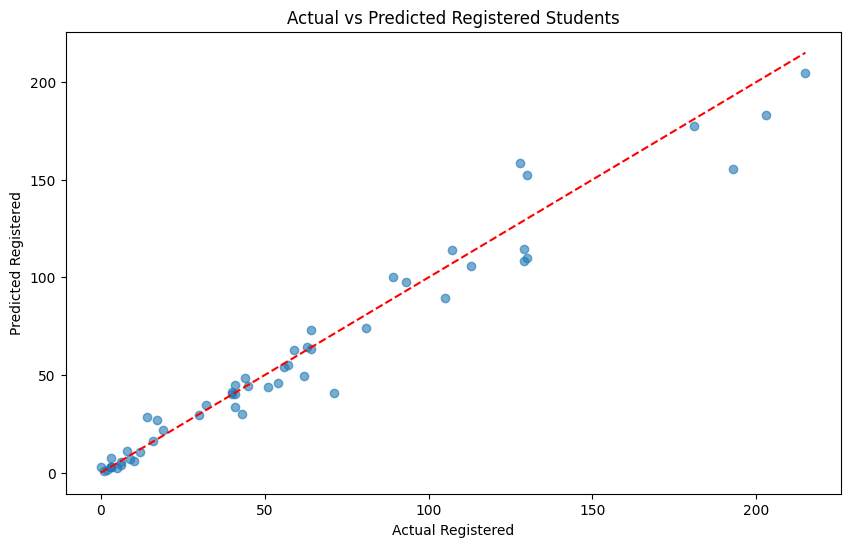

In [ ]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Registered')
plt.ylabel('Predicted Registered')
plt.title('Actual vs Predicted Registered Students')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect fit
plt.show()


**2. Residual Plot**

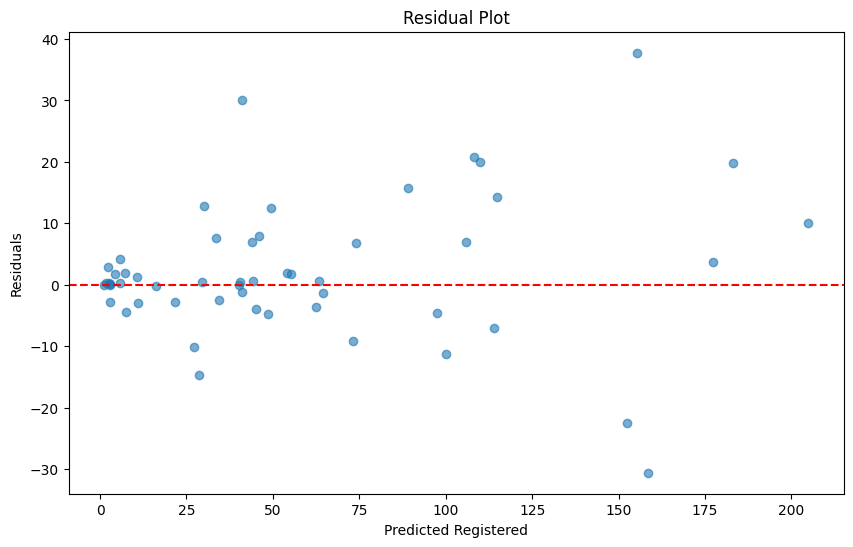

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.xlabel('Predicted Registered')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


**3. Distribution of Residuals**

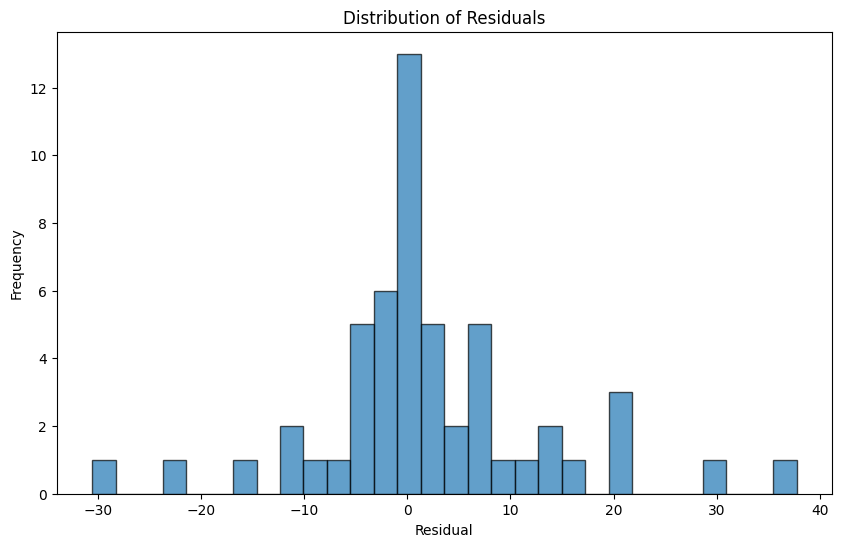

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


**4. Feature Importances**

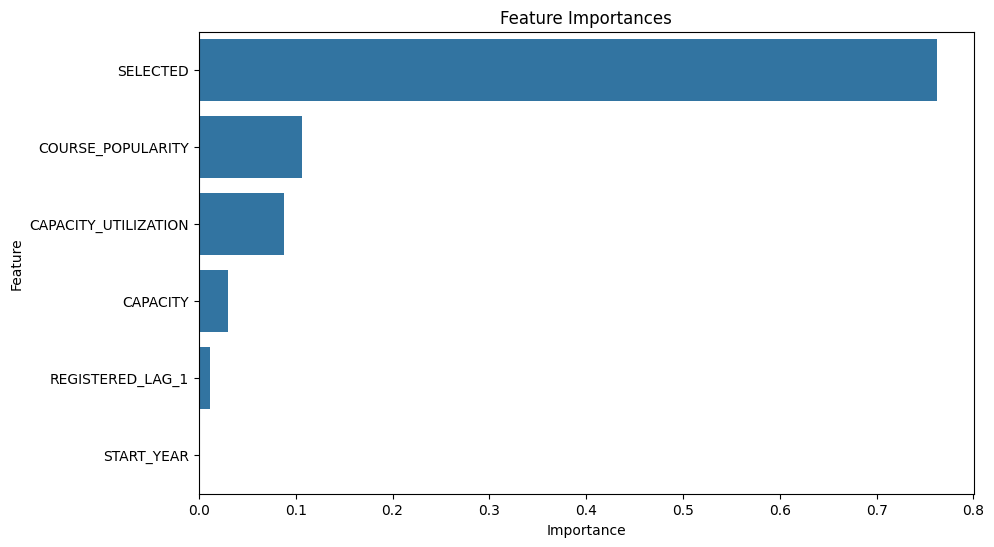

In [ ]:
import seaborn as sns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


**5. Time Series Plot (if applicable)**

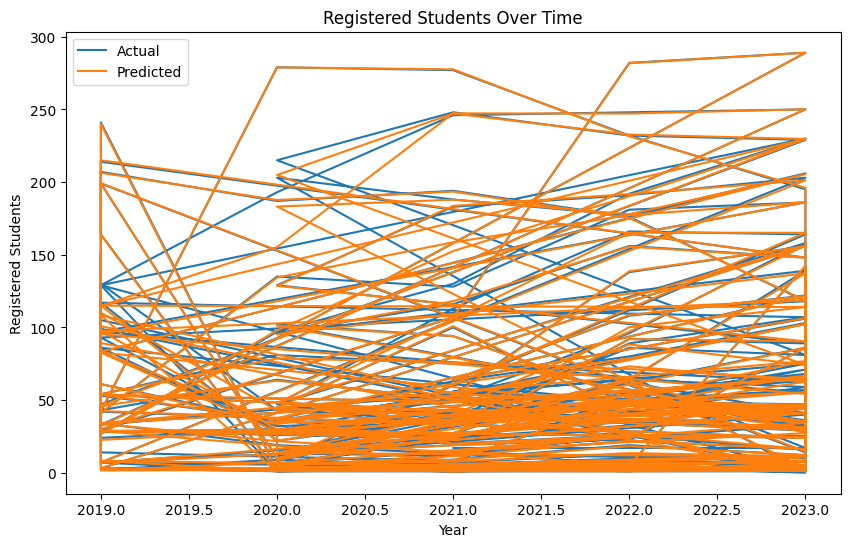

In [ ]:
# Assuming 'START_YEAR' is part of your data
plt.figure(figsize=(10, 6))
plt.plot(data['START_YEAR'], data['REGISTERED'], label='Actual')
plt.plot(data['START_YEAR'], best_model.predict(X), label='Predicted')
plt.xlabel('Year')
plt.ylabel('Registered Students')
plt.title('Registered Students Over Time')
plt.legend()
plt.show()


**6. Pairplot of Features**

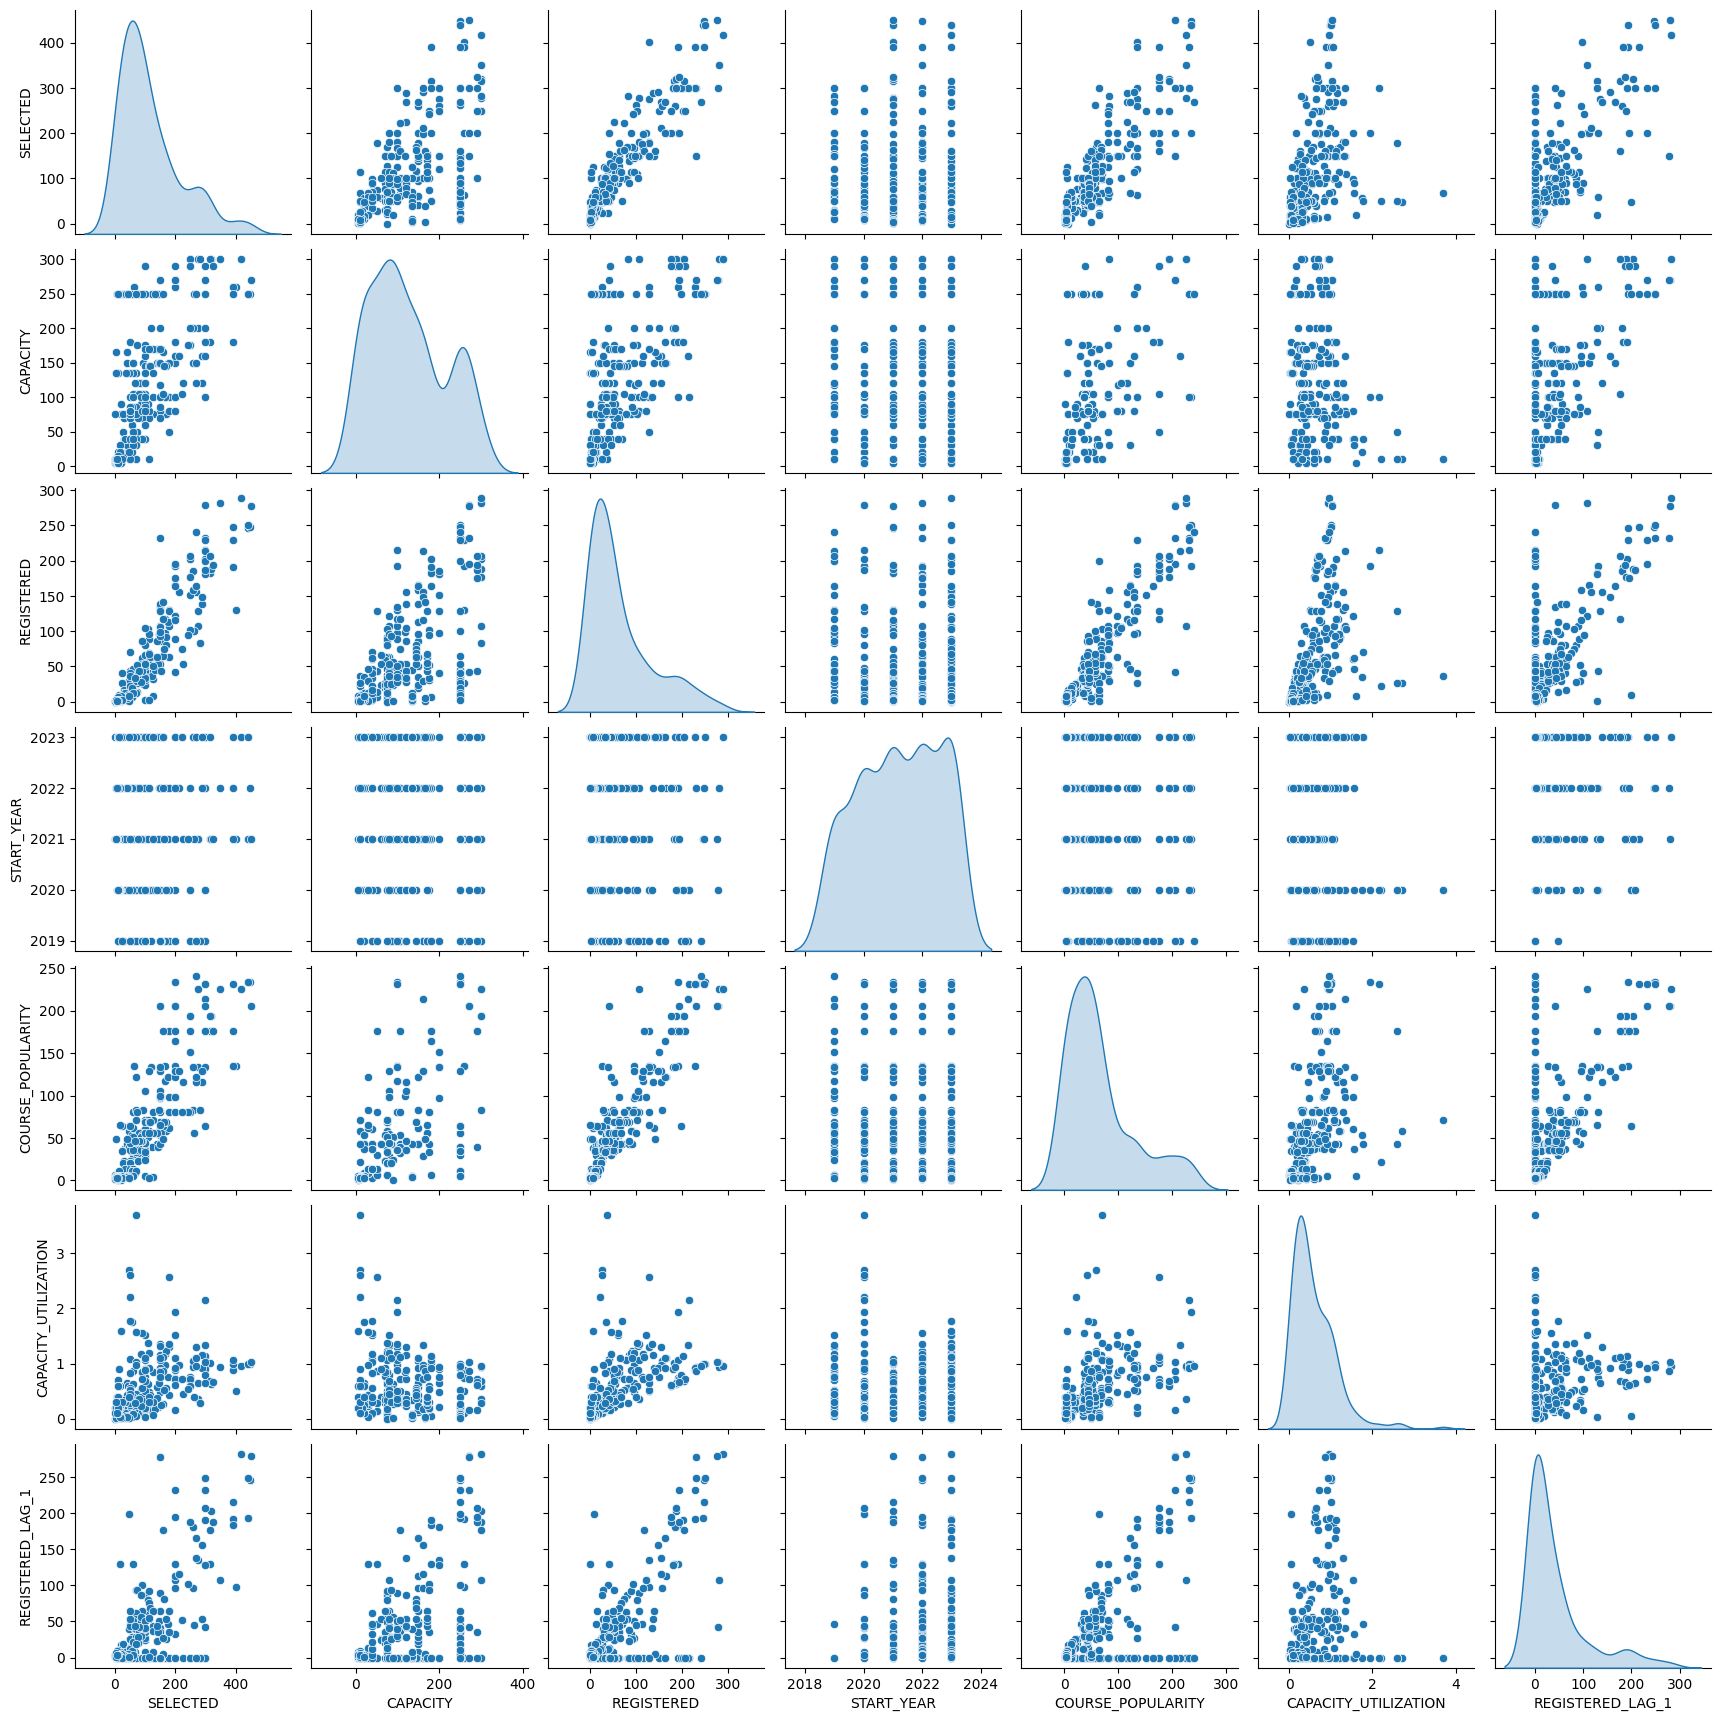

In [ ]:
sns.pairplot(data, diag_kind='kde')
plt.show()


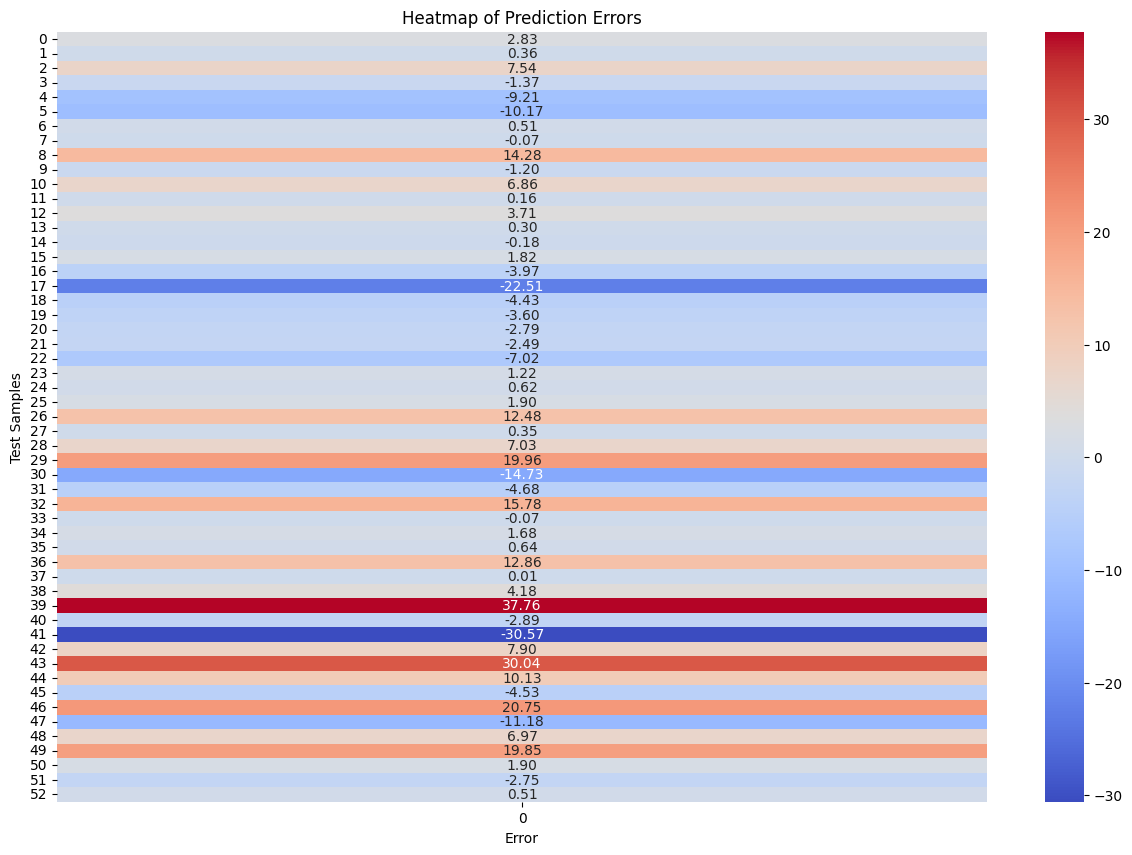

In [ ]:
import numpy as np
import seaborn as sns

# Calculate the errors (residuals)
errors = y_test - y_pred

# Create a larger heatmap of the errors
plt.figure(figsize=(15, 10))
sns.heatmap(np.reshape(errors, (-1, 1)), cmap='coolwarm', annot=True, cbar=True, fmt=".2f")
plt.title('Heatmap of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Test Samples')
plt.show()



If the heatmap reveals that some bars (samples) have higher residuals, it indicates that there are specific instances where the model's predictions are significantly off from the actual values. To gain further insights, you can:

Identify and Investigate High Residual Samples: Determine which samples have high residuals and investigate why the model performed poorly on these.
Visualize Residuals in Different Ways: Complement the heatmap with additional plots for better understanding.
Step 1: Identify High Residual Samples
Let's identify the samples with the highest residuals.

# **Step 1: Identify High Residual Samples**

In [ ]:
# Create a DataFrame to better visualize the data
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors
})

# Sort the DataFrame by the absolute value of the errors
error_df['Absolute Error'] = error_df['Error'].abs()
high_residual_samples = error_df.sort_values(by='Absolute Error', ascending=False).head(10)

print(high_residual_samples)


     Actual   Predicted      Error  Absolute Error
71      193  155.241013  37.758987       37.758987
123     128  158.572815 -30.572815       30.572815
230      71   40.961095  30.038905       30.038905
118     130  152.505909 -22.505909       22.505909
16      129  108.247661  20.752339       20.752339
21      130  110.041436  19.958564       19.958564
41      203  183.150685  19.849315       19.849315
18      105   89.216655  15.783345       15.783345
27       14   28.729708 -14.729708       14.729708
20      129  114.717309  14.282691       14.282691


# **Step 2: Visualize Residuals with Additional Plots**

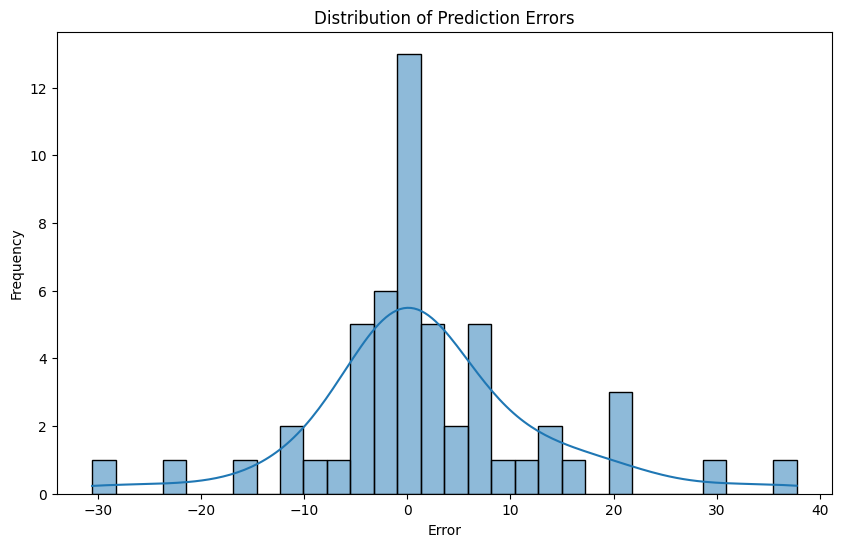

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


# **Actual vs. Predicted with Residuals**

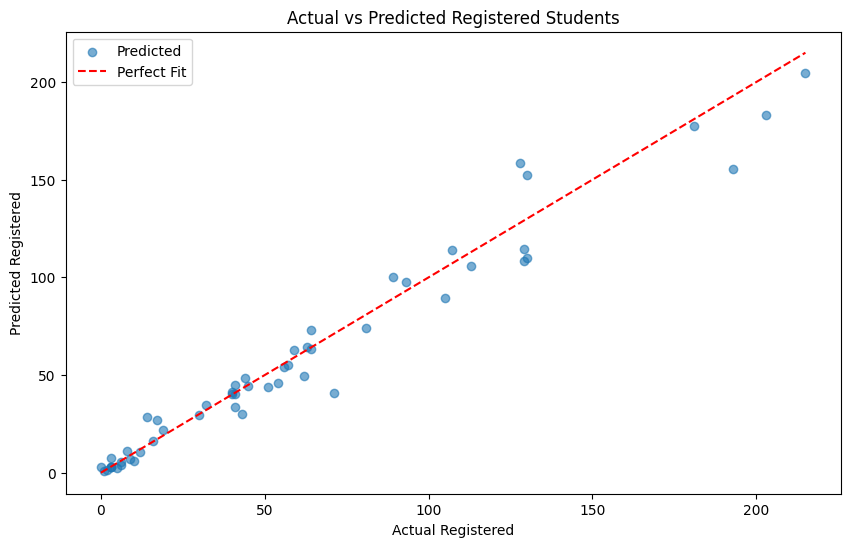

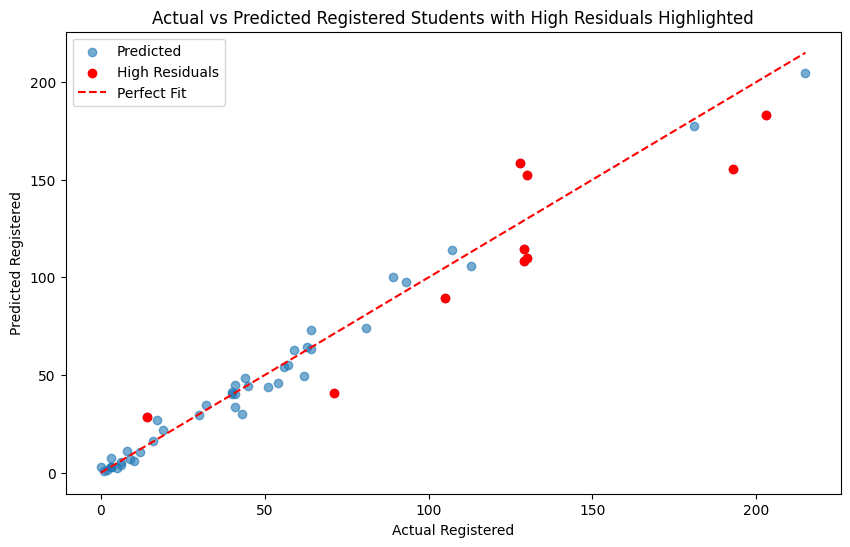

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted')
plt.xlabel('Actual Registered')
plt.ylabel('Predicted Registered')
plt.title('Actual vs Predicted Registered Students')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.show()

# Highlight samples with high residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted')
plt.scatter(high_residual_samples['Actual'], high_residual_samples['Predicted'], color='red', label='High Residuals')
plt.xlabel('Actual Registered')
plt.ylabel('Predicted Registered')
plt.title('Actual vs Predicted Registered Students with High Residuals Highlighted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.show()


# **Step 3: Analyze Features of High Residual Samples**

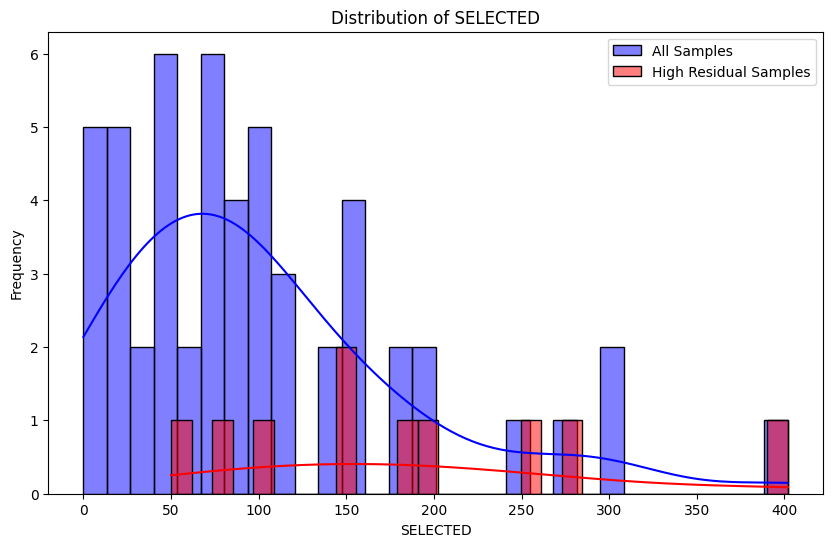

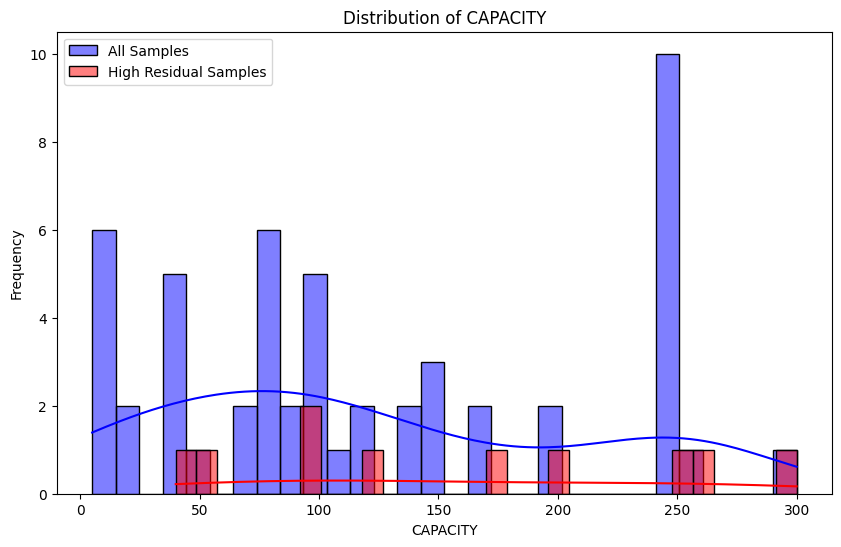

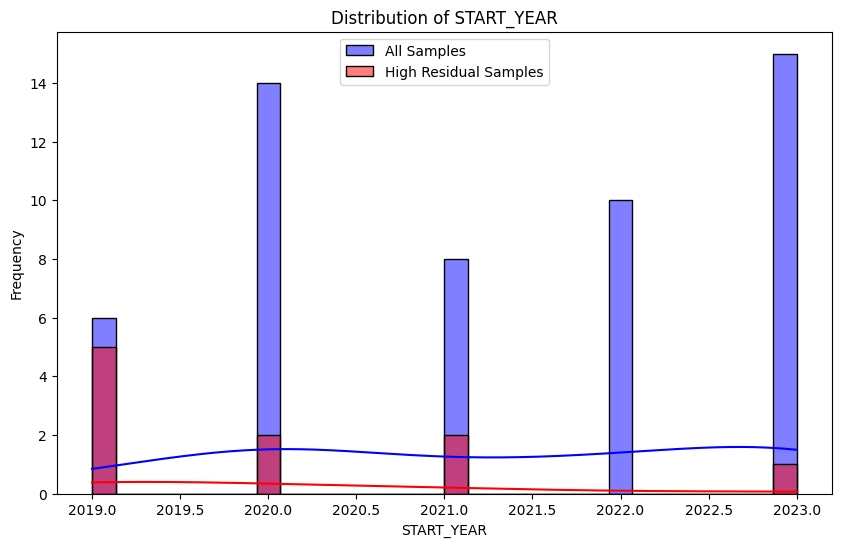

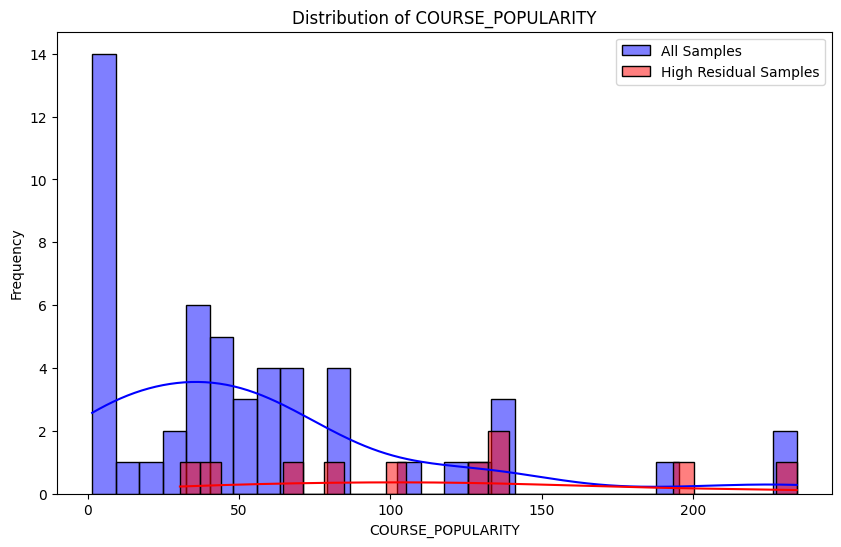

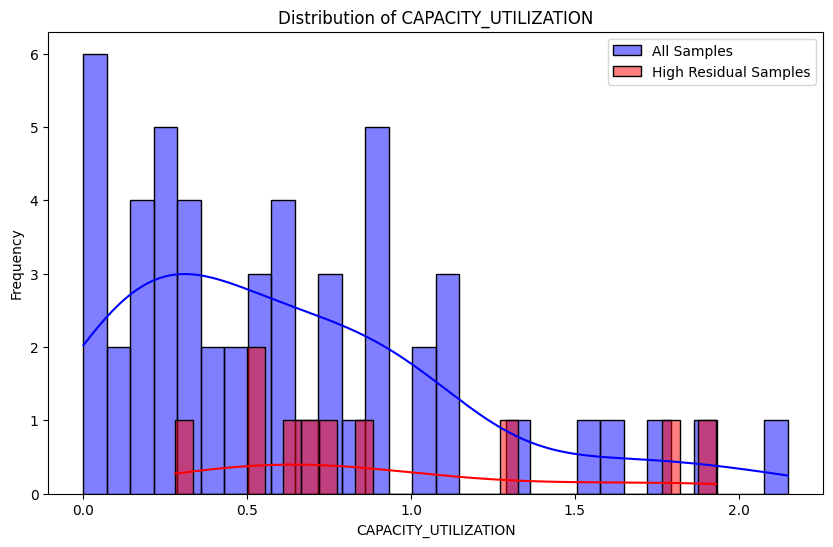

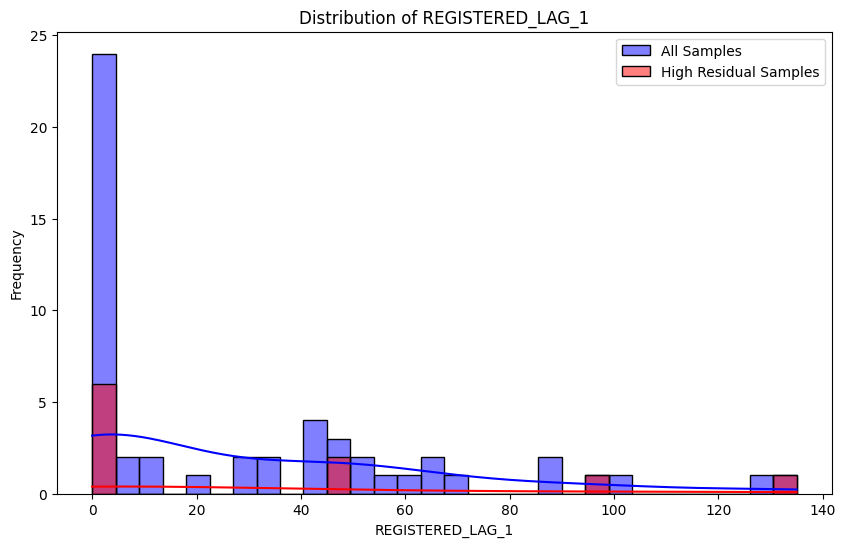

In [ ]:
# Extract features of high residual samples
high_residual_features = X_test.loc[high_residual_samples.index]

# Compare the high residual samples against the overall distribution
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_test[feature], bins=30, kde=True, color='blue', label='All Samples')
    sns.histplot(high_residual_features[feature], bins=30, kde=True, color='red', label='High Residual Samples')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [ ]:
#END HERE

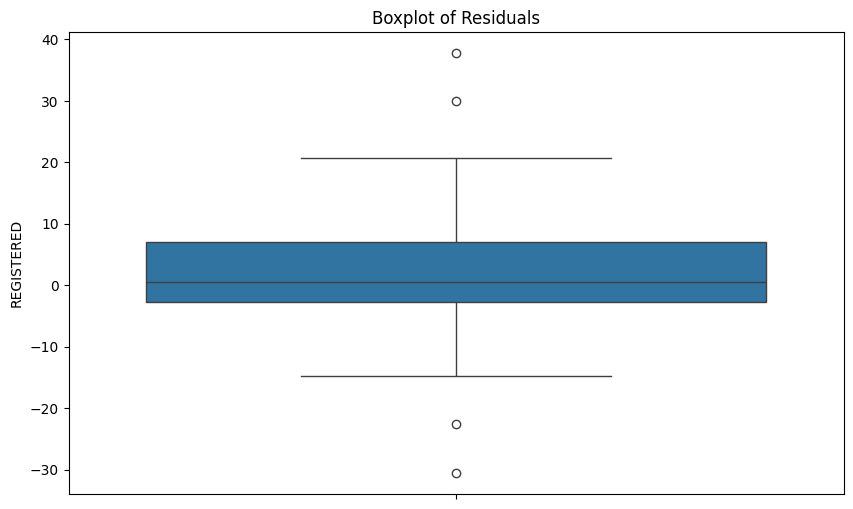

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.boxplot(y=errors)
plt.title('Boxplot of Residuals')
plt.show()


In [ ]:
import numpy as np

# Calculate the residuals/errors
errors = y_train - best_model.predict(X_train)

# Define a threshold for considering residuals as outliers (e.g., 3 standard deviations)
threshold = 3 * np.std(errors)

# Identify outliers
outliers = np.abs(errors) > threshold

# Ensure that the index of 'outliers' aligns with 'X_train' and 'y_train'
outliers = outliers.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Remove outliers from the dataset
X_train_no_outliers = X_train[~outliers]
y_train_no_outliers = y_train[~outliers]

print(f"Removed {outliers.sum()} outliers")


Removed 3 outliers


In [ ]:
# Retrain the model without outliers
best_model.fit(X_train_no_outliers, y_train_no_outliers)

# Predict on the test set
y_pred_no_outliers = best_model.predict(X_test)

# Evaluate the model performance
mse_no_outliers = mean_squared_error(y_test, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test, y_pred_no_outliers)

print(f"Best Gradient Boosting Regressor (without outliers) - MSE: {mse_no_outliers}, R^2: {r2_no_outliers}")


Best Gradient Boosting Regressor (without outliers) - MSE: 174.41621967278797, R^2: 0.9439047462337515


In [ ]:
# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_no_outliers)
X_test_poly = poly.transform(X_test)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(estimator=best_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_poly, y_train_no_outliers)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate on the test set
y_pred_tuned = best_model.predict(X_test_poly)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Gradient Boosting Regressor - MSE: {mse_tuned}, R^2: {r2_tuned}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Gradient Boosting Regressor - MSE: 0.987392068240812, R^2: 0.9996824377415204


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_poly, y_train_no_outliers, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [0.99963737 0.99971422 0.99952784 0.99940995 0.99917679]
Mean Cross-Validation R² Score: 0.9994932331209423


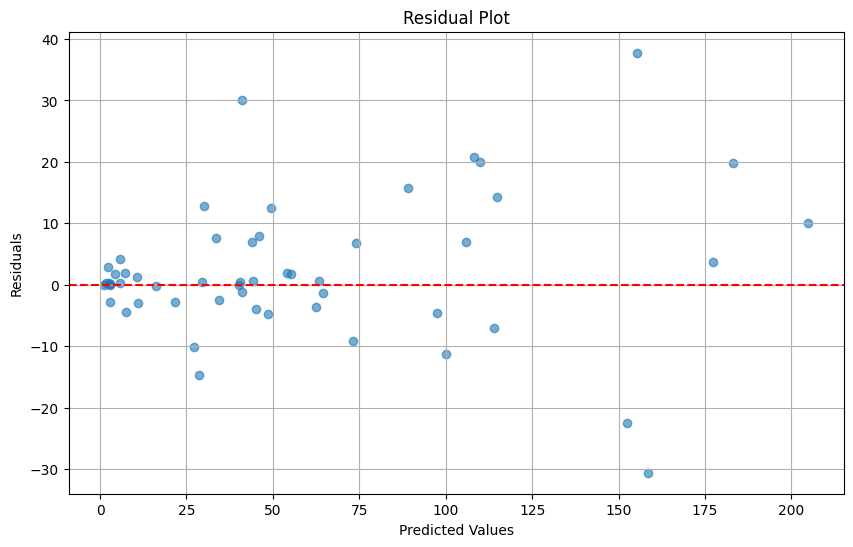

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals/errors
errors = y_test - y_pred

# Create a scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


# **Step 1: Generate Predictions with the Improved Model**

In [ ]:
# Predict on the test set using the improved model
y_pred_improved = best_model.predict(X_test_poly)

# Calculate the new residuals/errors
errors_improved = y_test - y_pred_improved


# **Step 2: Create and Display the DataFrame of High Residual Samples**

In [ ]:
import pandas as pd

# Create a DataFrame to better visualize the data
error_df_improved = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_improved,
    'Error': errors_improved
})

# Sort the DataFrame by the absolute value of the errors
error_df_improved['Absolute Error'] = error_df_improved['Error'].abs()
high_residual_samples_improved = error_df_improved.sort_values(by='Absolute Error', ascending=False).head(10)

print(high_residual_samples_improved)


     Actual   Predicted     Error  Absolute Error
71      193  189.107980  3.892020        3.892020
131     113  115.975206 -2.975206        2.975206
179     181  178.854217  2.145783        2.145783
246      57   54.993478  2.006522        2.006522
229      59   60.977046 -1.977046        1.977046
230      71   69.038447  1.961553        1.961553
123     128  129.322190 -1.322190        1.322190
225      16   17.197039 -1.197039        1.197039
21      130  128.942752  1.057248        1.057248
132      51   49.950718  1.049282        1.049282


# **Step 3: Create a Heatmap of the Residuals**

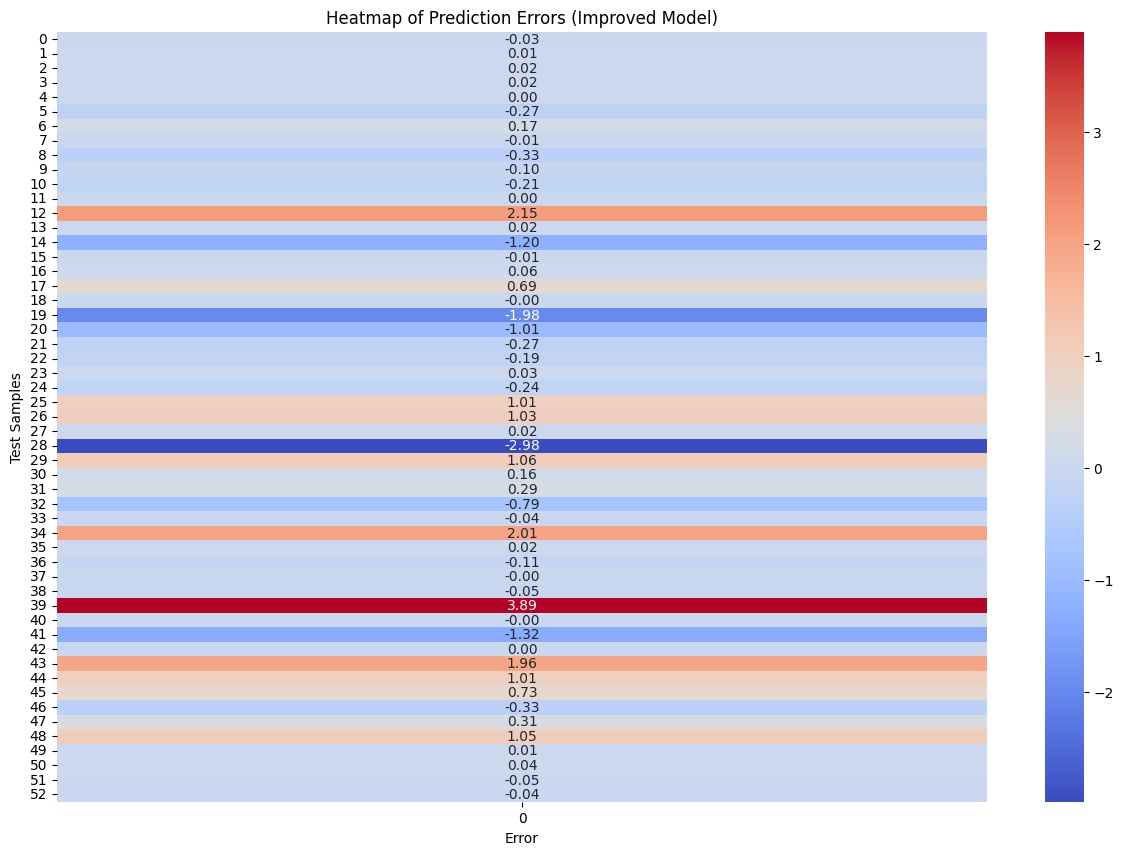

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger heatmap of the errors
plt.figure(figsize=(15, 10))
sns.heatmap(np.reshape(errors_improved, (-1, 1)), cmap='coolwarm', annot=True, cbar=True, fmt=".2f")
plt.title('Heatmap of Prediction Errors (Improved Model)')
plt.xlabel('Error')
plt.ylabel('Test Samples')
plt.show()


# **Actual vs. Predicted with Residuals**

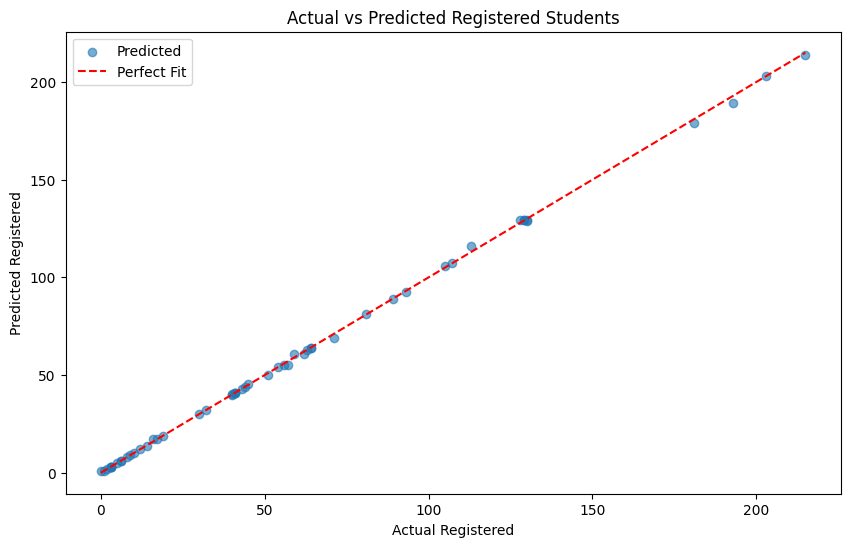

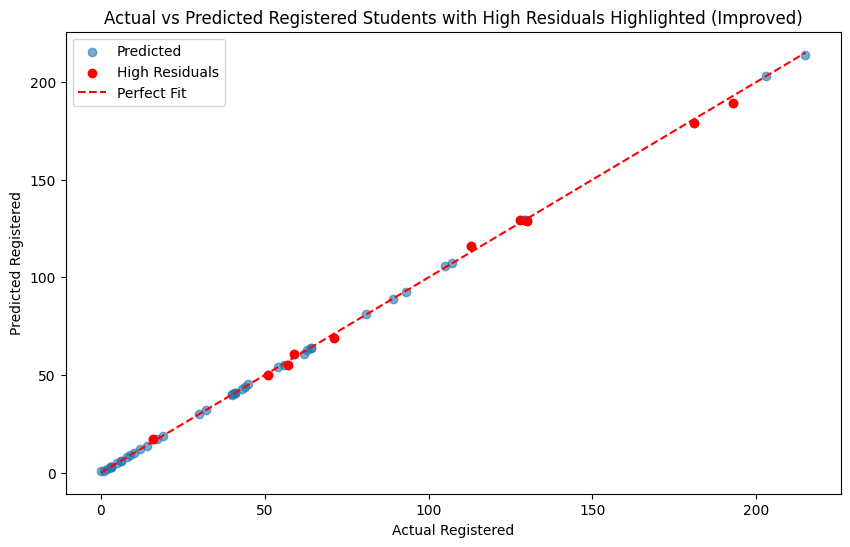

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_improved, alpha=0.6, label='Predicted')
plt.xlabel('Actual Registered')
plt.ylabel('Predicted Registered')
plt.title('Actual vs Predicted Registered Students')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.show()

# Highlight samples with high residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_improved, alpha=0.6, label='Predicted')
plt.scatter(high_residual_samples_improved['Actual'], high_residual_samples_improved['Predicted'], color='red', label='High Residuals')
plt.xlabel('Actual Registered')
plt.ylabel('Predicted Registered')
plt.title('Actual vs Predicted Registered Students with High Residuals Highlighted (Improved)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.show()


# **Step 3: Analyze Features of High Residual Samples**

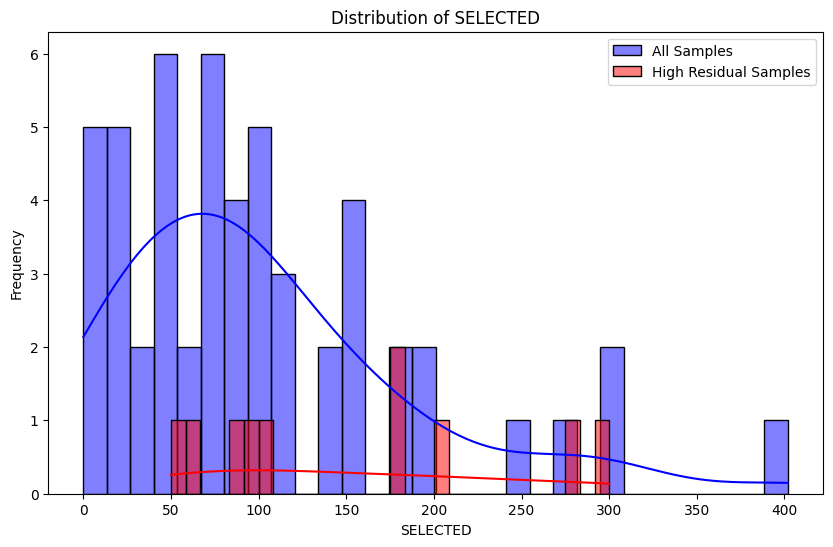

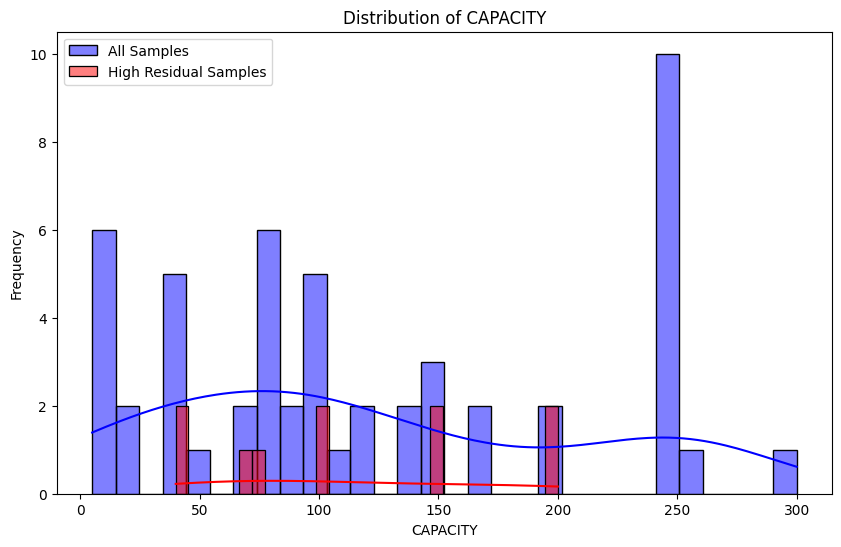

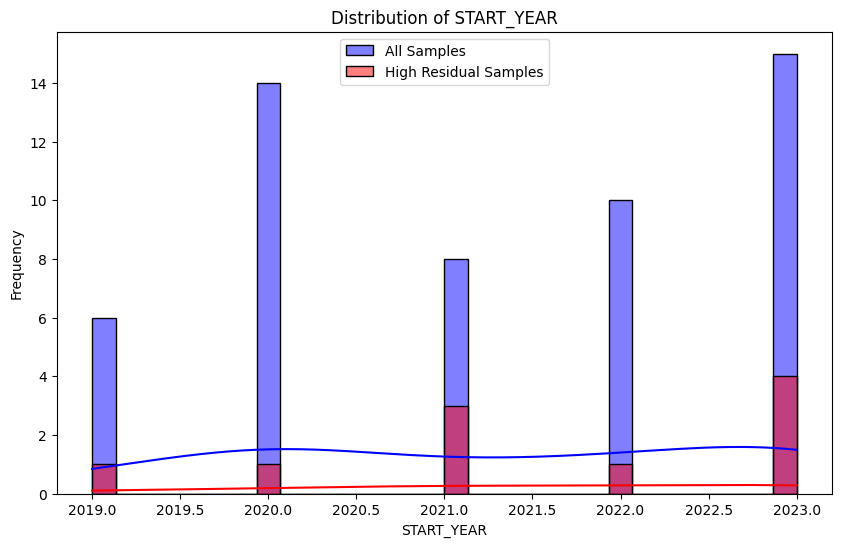

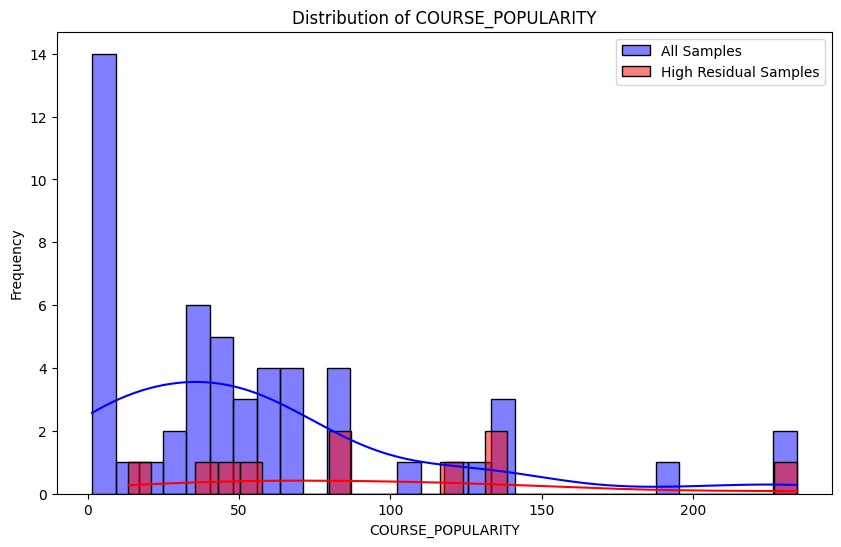

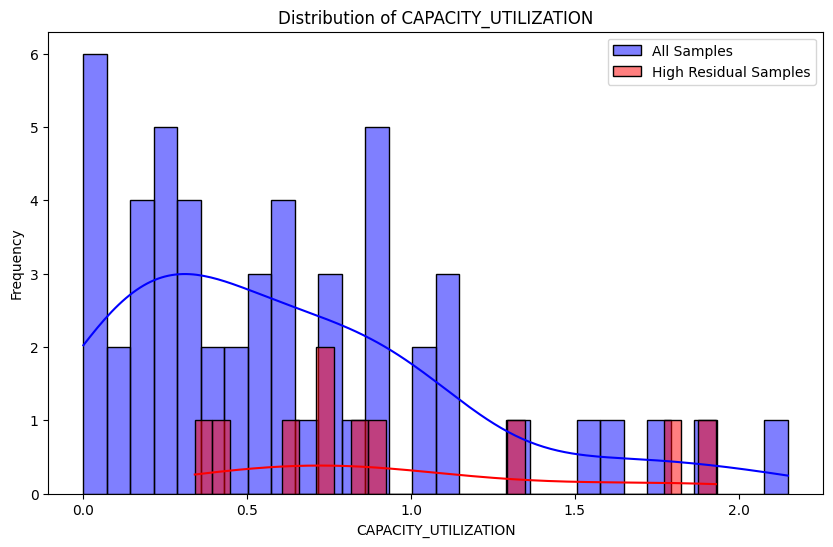

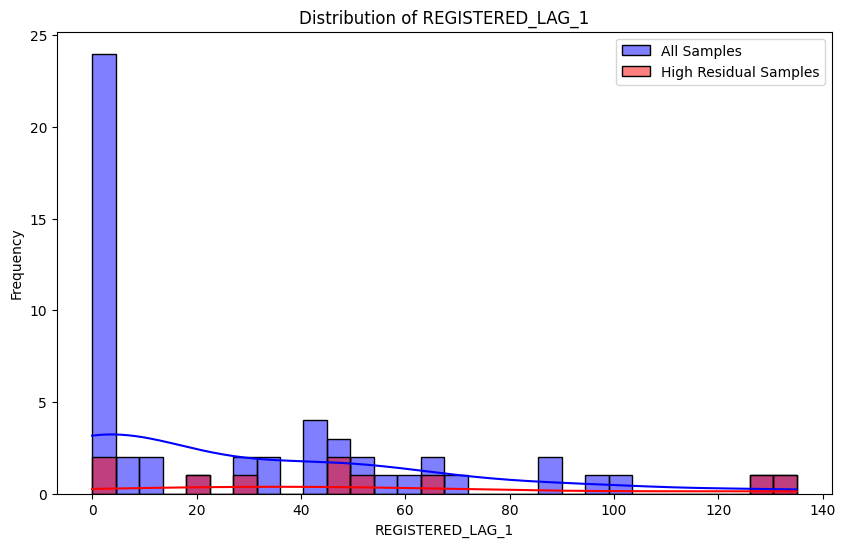

In [ ]:
# Extract features of high residual samples
high_residual_features_improved = X_test.loc[high_residual_samples_improved.index]

# Compare the high residual samples against the overall distribution
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_test[feature], bins=30, kde=True, color='blue', label='All Samples')
    sns.histplot(high_residual_features_improved[feature], bins=30, kde=True, color='red', label='High Residual Samples')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# **SAVE THE MODEL FOR THE LATER USE**

In [ ]:
import joblib

# Save the model to a file
joblib.dump(best_model, '/content/drive/MyDrive/UNIVERSITY ENROLMENT/best_model_gradientBoostingRegressor.pkl')

print("Model saved as '/content/drive/MyDrive/UNIVERSITY ENROLMENT/best_model_gradientBoostingRegressor.pkl'")


Model saved as '/content/drive/MyDrive/UNIVERSITY ENROLMENT/best_model_gradientBoostingRegressor.pkl'
